In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
df = pd.read_csv('Housing.csv')


# Hypothesis

$$
w^* = (X^T X)^{-1} X^T y
$$

In [166]:
def h(X, y):
    """
    Args:
        X : np.ndarray
        Feature matrix (design matrix).
        y : np.ndarray
        Target vector.
    """
    X_transpose = X.T
    X_transpose_X = X_transpose @ X
    X_transpose_X_inv = np.linalg.inv(X_transpose_X)
    X_transpose_y = X_transpose @ y
    w_star = X_transpose_X_inv @ X_transpose_y
    
    return w_star

# Gradient descent

In [167]:
def mean_squared_error(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Function to perform gradient descent
def gradient_descent(X, y, weights, iterations=1000, learning_rate=0.01, stopping_threshold=1e-6):
    m = len(y)
    cost_history = []
    prev_cost = float('inf')
    
    for i in range(iterations):
        predictions = X.dot(weights)
        errors = predictions - y
        weights -= (learning_rate/m) * X.T.dot(errors)
        cost = mean_squared_error(X, y, weights)
        cost_history.append(cost)
        
        if abs(prev_cost - cost) < stopping_threshold:
            print(f"Gradient descent converged after {i+1} iterations.")
            break
        
        prev_cost = cost

    
    return weights, cost_history

In [168]:
def normalization_column(data):
    mean = np.mean(data)
    value_range = np.max(data) - np.min(data)
    result = []
    for x in data:
        norm_x = (x - mean) / value_range
        result.append(norm_x)
    return result
    


In [169]:
norm = pd.DataFrame()
features = ['area', 'bathrooms', 'bedrooms']
norm['price'] = normalization_column(df.price)
norm['area'] = normalization_column(df.area)
norm['bathrooms'] = normalization_column(df.bathrooms)
norm['bedrooms'] = normalization_column(df.bedrooms)
y = norm['price']
df_X = norm[features]
df_X['intercept'] = 1
df_X.shape


(545, 4)

In [170]:
# Initialize theta
w_zero = np.zeros(df_X.shape[1])

# Perform gradient descent
params, cost_history  = gradient_descent(df_X, y, w_zero, learning_rate=0.1)
weights = params[:-1]
intercept = params[-1]

# Print the results
print("Weights:", weights)
print("Cost history:", cost_history)
print("intercept:", intercept)

Gradient descent converged after 567 iterations.
Weights: area         0.363246
bathrooms    0.322678
bedrooms     0.183002
dtype: float64
Cost history: [0.013044776677262008, 0.013001185896804922, 0.012957904437737765, 0.012914930066404033, 0.012872260565435136, 0.012829893733630988, 0.012787827385841473, 0.012746059352848794, 0.01270458748125067, 0.012663409633344396, 0.012622523687011765, 0.012581927535604834, 0.012541619087832509, 0.012501596267647994, 0.012461857014137054, 0.012422399281407088, 0.012383221038477048, 0.012344320269168124, 0.012305694971995278, 0.01226734316005954, 0.01222926286094112, 0.012191452116593282, 0.012153908983237031, 0.012116631531256541, 0.012079617845095363, 0.01204286602315341, 0.012006374177684683, 0.011970140434695747, 0.011934162933844975, 0.011898439828342502, 0.011862969284850934, 0.011827749483386793, 0.011792778617222655, 0.011758054892790058, 0.011723576529583057, 0.011689341760062569, 0.011655348829561332, 0.011621595996189641, 0.011588081530

/var/folders/zb/nl25s0l50sl0r6n18b3fm3w00000gp/T/ipykernel_183/4263987634.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = params[-1]


In [171]:
w_star = h(df_X, y)
print(w_star)
print(params)

[4.77142690e-01 3.60012857e-01 1.76112569e-01 4.11206089e-17]
area         3.632463e-01
bathrooms    3.226781e-01
bedrooms     1.830016e-01
intercept    4.849332e-17
dtype: float64


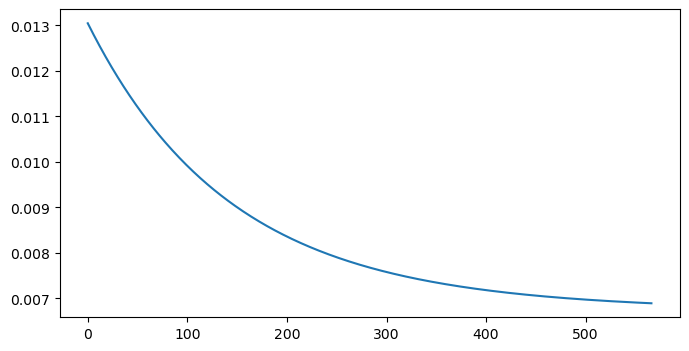

In [163]:
plt.figure(figsize=(8, 4))
plt.plot(cost_history)

# Scikit-learn Linear Regression


In [172]:
from sklearn import linear_model

In [174]:
model = linear_model.LinearRegression()
model.fit(X=df_X, y=y)

LinearRegression()

In [173]:
model.coef_, model.intercept_

(array([0.47714269, 0.36001286, 0.17611257, 0.        ]),
 7.014204135081996e-17)

In [175]:
print(w_star)
print(params)

[4.77142690e-01 3.60012857e-01 1.76112569e-01 4.11206089e-17]
area         3.632463e-01
bathrooms    3.226781e-01
bedrooms     1.830016e-01
intercept    4.849332e-17
dtype: float64


# Visualization

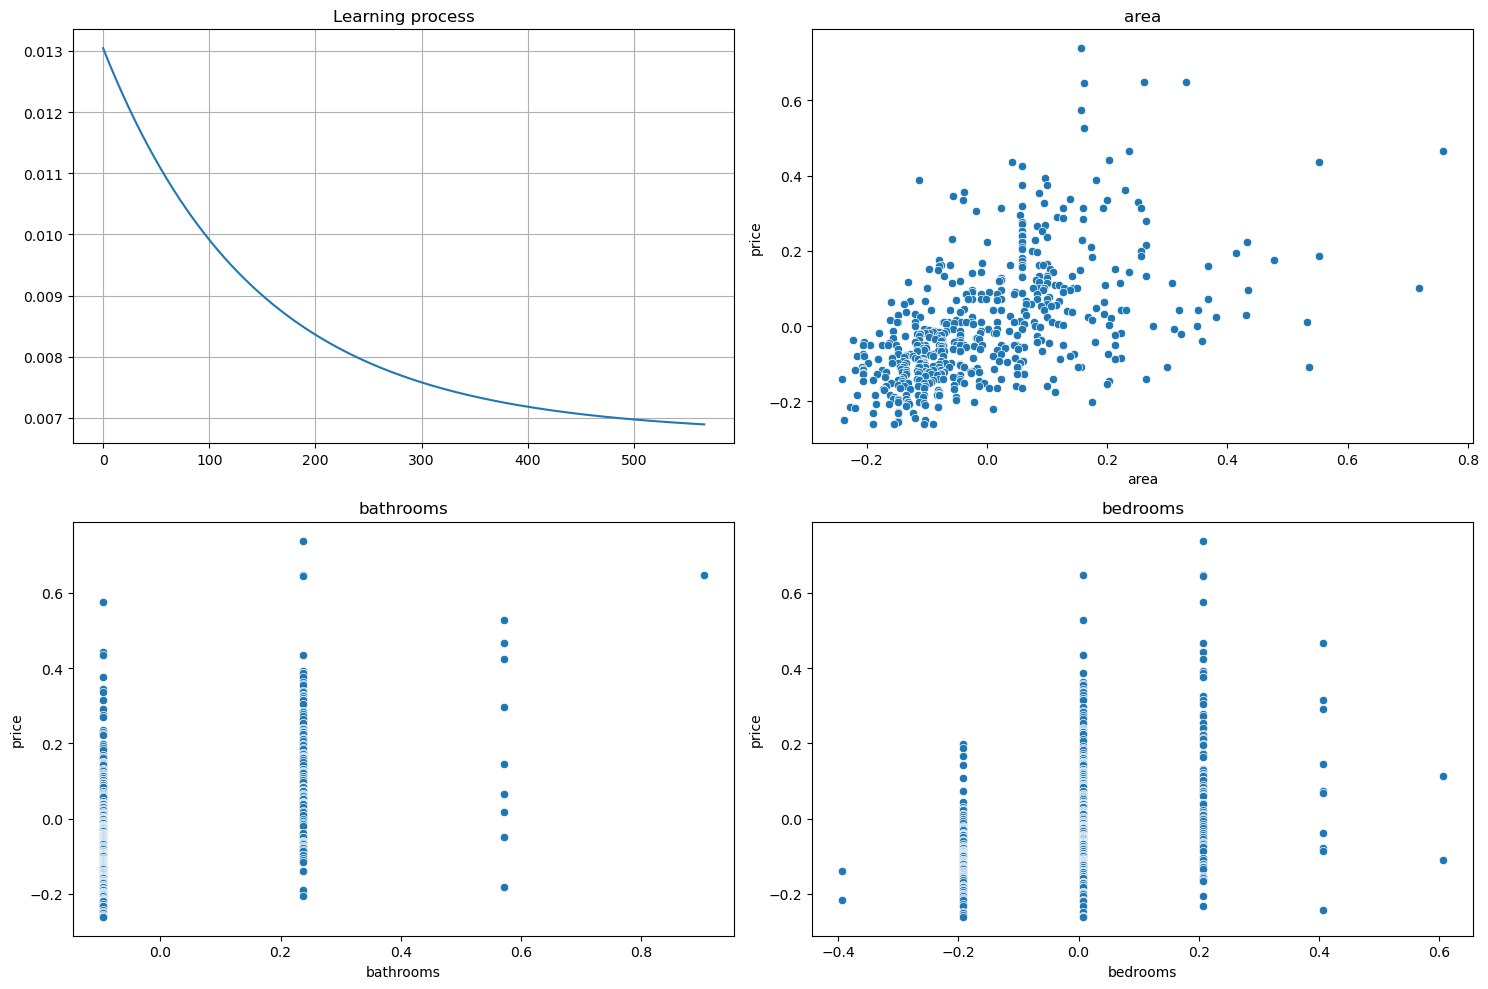

Analytical solution (w_star): [4.77142690e-01 3.60012857e-01 1.76112569e-01 4.11206089e-17]
Gradient descent(weights): area         0.363246
bathrooms    0.322678
bedrooms     0.183002
dtype: float64


In [176]:
# Візуалізація всіх графіків на одному рисунку
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Процес навчання: Зміна вартості від кількості ітерацій
axs[0, 0].plot(cost_history)
axs[0, 0].set_title('Learning process')
axs[0, 0].grid(True)

# Залежність ціни від площі
sns.scatterplot(x=norm['area'], y=norm['price'], ax=axs[0, 1])
axs[0, 1].set_title('area')

# Залежність ціни від кількості ванних кімнат
sns.scatterplot(x=norm['bathrooms'], y=norm['price'], ax=axs[1, 0])
axs[1, 0].set_title('bathrooms')

# Залежність ціни від кількості спалень
sns.scatterplot(x=norm['bedrooms'], y=norm['price'], ax=axs[1, 1])
axs[1, 1].set_title('bedrooms')

plt.tight_layout()
plt.show()

print(f"Analytical solution (w_star): {w_star}")
print(f"Gradient descent(weights): {weights}")

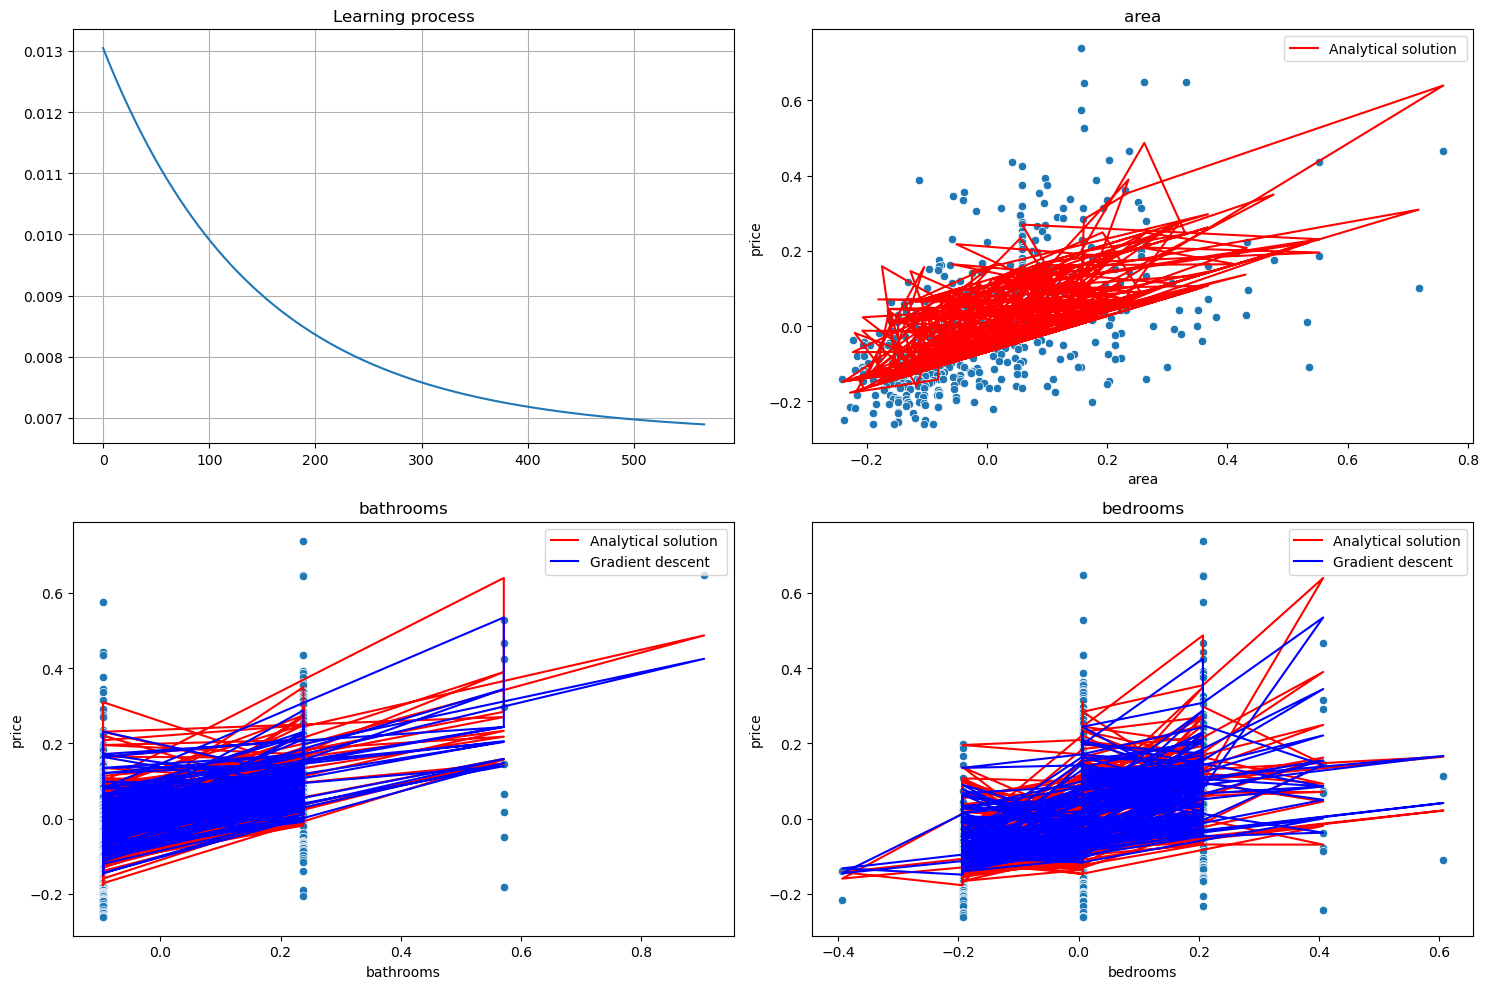

Analytical solution(w_star): [4.77142690e-01 3.60012857e-01 1.76112569e-01 4.11206089e-17]
Gradient descent(weights): area         0.363246
bathrooms    0.322678
bedrooms     0.183002
dtype: float64


In [177]:
# Прогнозні значення
y_pred_analytical = df_X @ w_star
y_pred_gd = df_X @ params

# Візуалізація всіх графіків на одному рисунку
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Процес навчання: Зміна вартості від кількості ітерацій
axs[0, 0].plot(cost_history)
axs[0, 0].set_title('Learning process')
axs[0, 0].grid(True)

# Залежність ціни від площі
sns.scatterplot(x=norm['area'], y=norm['price'], ax=axs[0, 1])
axs[0, 1].plot(norm['area'], y_pred_analytical, label='Analytical solution ', color='red')
# axs[0, 1].plot(norm['area'], y_pred_gd, label='Gradient descent', color='blue')
axs[0, 1].set_title('area')
axs[0, 1].legend()

# Залежність ціни від кількості ванних кімнат
sns.scatterplot(x=norm['bathrooms'], y=norm['price'], ax=axs[1, 0])
axs[1, 0].plot(norm['bathrooms'], y_pred_analytical, label='Analytical solution ', color='red')
axs[1, 0].plot(norm['bathrooms'], y_pred_gd, label='Gradient descent', color='blue')
axs[1, 0].set_title('bathrooms')
axs[1, 0].legend()

# Залежність ціни від кількості спалень
sns.scatterplot(x=norm['bedrooms'], y=norm['price'], ax=axs[1, 1])
axs[1, 1].plot(norm['bedrooms'], y_pred_analytical, label='Analytical solution', color='red')
axs[1, 1].plot(norm['bedrooms'], y_pred_gd, label='Gradient descent', color='blue')
axs[1, 1].set_title('bedrooms')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

print(f"Analytical solution(w_star): {w_star}")
print(f"Gradient descent(weights): {weights}")

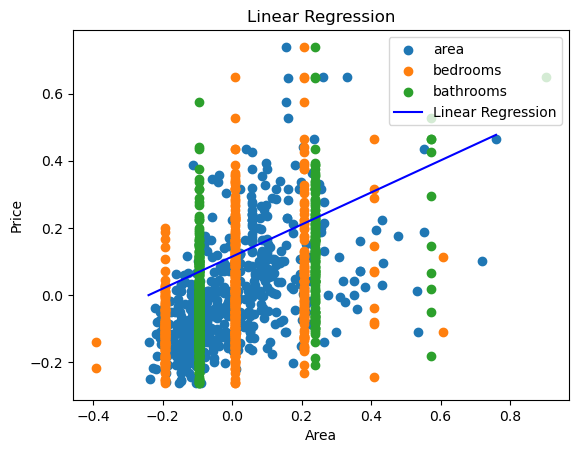

In [178]:
plt.scatter(norm['area'], norm['price'], label='area')
plt.scatter(norm['bedrooms'], norm['price'], label='bedrooms')
plt.scatter(norm['bathrooms'], norm['price'], label='bathrooms')
plt.plot([norm['area'].min(), norm['area'].max()], [h(df_X, y).min(), h(df_X, y).max()], '-b', label='Linear Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.show()